<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Sample 데이터를 만들어 SVM을 살펴봅니다.
- 몇 몇 하이퍼파라미터를 조정해 결과를 비교합니다.


In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

# 1.SVC를 사용한 분류

## 1.1.데이터 준비

- make_classification을 사용해 데이터를 만듭니다.
    - n_samples: 표본 데이터 수 (기본값=100)
    - n_features: 독립 변수 수 (기본값=20)
    - n_informative: 독립 변수 중 종속 변수와 상관 관계가 있는 성분 수 (기본값=2)
    - n_redundant: 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분 수 (기본값=2)
    - n_repeated: 독립 변수 중 단순 중복된 성분 수 (기본값= 0)
    - n_classes: 종속 변수의 클래스 수 (기본값=2)
    - n_clusters_per_class: 클래스 당 클러스터 수 (기본값=2)
    - weights: 각 클래스에 할당된 표본 수
    - random_state: 난수 발생 시드

In [2]:
# 데이터 만들기
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000,
                           n_features=2, 
                           n_informative=2,
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=142)

- 위에서 만든 데이터 분포를 확인합니다.

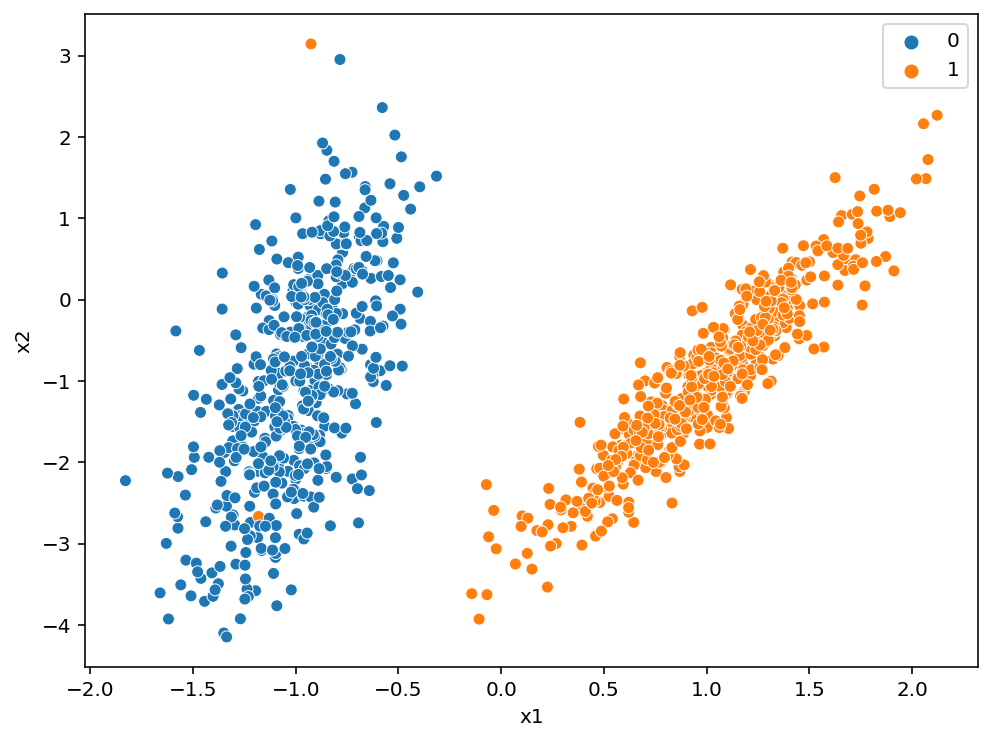

In [3]:
# 데이터 분포 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

- SVM는 거리 정보가 중요하니 정규화를 진행합니다.

In [4]:
# 졍규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

## 1.2.모델링

- 손쉬운 접근을 위해 kernel='linear'를 지정해 모델을 만듭니다.
- 학습 후 임의의 데이터로 분류 능력을 확인합니다.

In [5]:
# 불러오기
from sklearn.svm import SVC


In [26]:
# 선언하기
model = SVC(kernel='rbf', C= 10)

In [27]:
# 학습하기
model.fit(x,y)

SVC(C=10)

## 1.3.살펴보기

- 학습을 통해 설정된 결정 경계화 마진을 시각화합니다.
- 시각화 결과 위에 임의의 세 점을 표시해 무엇으로 분류될 지 예측해봅니다.

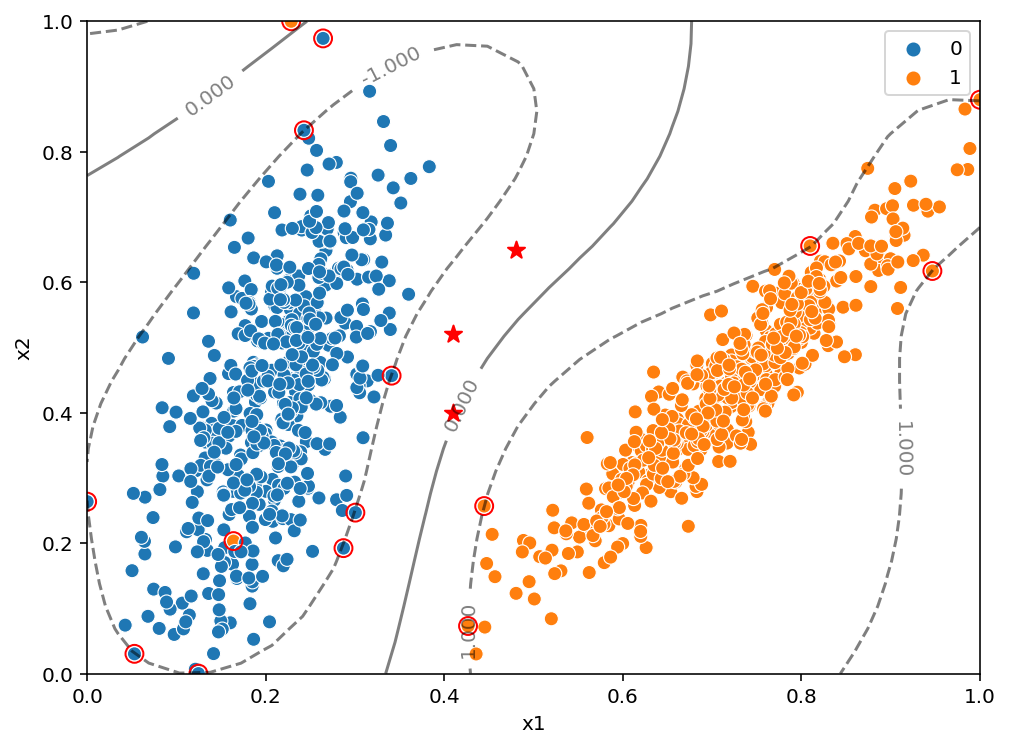

In [29]:
xx = np.linspace(0, 1, 30)
yy = np.linspace(0, 1, 30)
yy, xx = np.meshgrid(yy, xx)
xy = np.vstack([xx.ravel(), yy.ravel()]).T
z = model.decision_function(xy).reshape(xx.shape)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y, s=50)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=80,
            linewidth=1,
            facecolors='none', 
            color='r')
SV = plt.contour(xx, yy, z, 
            colors='k', 
            levels=[-1, 0, 1], 
            alpha=0.5,
            linestyles=['--', '-', '--'])
plt.clabel(SV)
plt.scatter(x=[0.41, 0.41, 0.48], y=[0.4, 0.52, 0.65], 
            color='r', 
            marker='*', 
            s=80)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# 2.SVR를 사용한 회귀

## 2.1.데이터 준비

- 임의의 데이터를 만듭니다.

In [30]:
# 데이터 만들기
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000,
                       n_features=1, 
                       n_informative=1,
                       noise=10,
                       random_state=142)

- 위에서 만든 데이터 분포를 확인합니다.

In [31]:
# 데이터 만들기
x = np.random.uniform(-3, 3, size=1000)
y = 0.5 * x**3 + x + 2 + np.random.normal(0, 5, size=1000)
x = x.reshape(-1, 1)

- 위에서 만든 데이터 분포를 확인합니다.

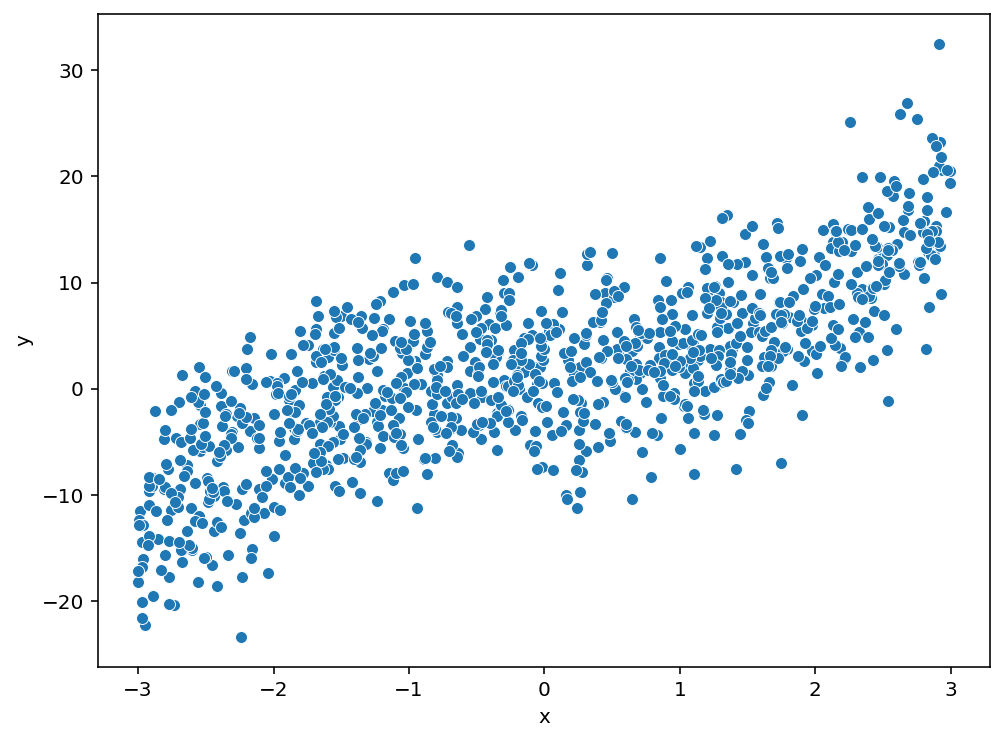

In [32]:
# 데이터 분포 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.reshape(-1), y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2.2.모델링

- 손쉬운 접근을 위해 kernel='linear'를 지정해 모델을 만듭니다.

In [33]:
# 불러오기
from sklearn.svm import SVR

In [47]:
# 선언하기
model = SVR(kernel='rbf', epsilon=10)

In [48]:
# 학습하기
model.fit(x, y)

SVR(epsilon=10)

## 2.3.살펴보기

- 학습을 통해 설정된 결정 경계와 마진, 서포트 벡터를 시각화합니다.

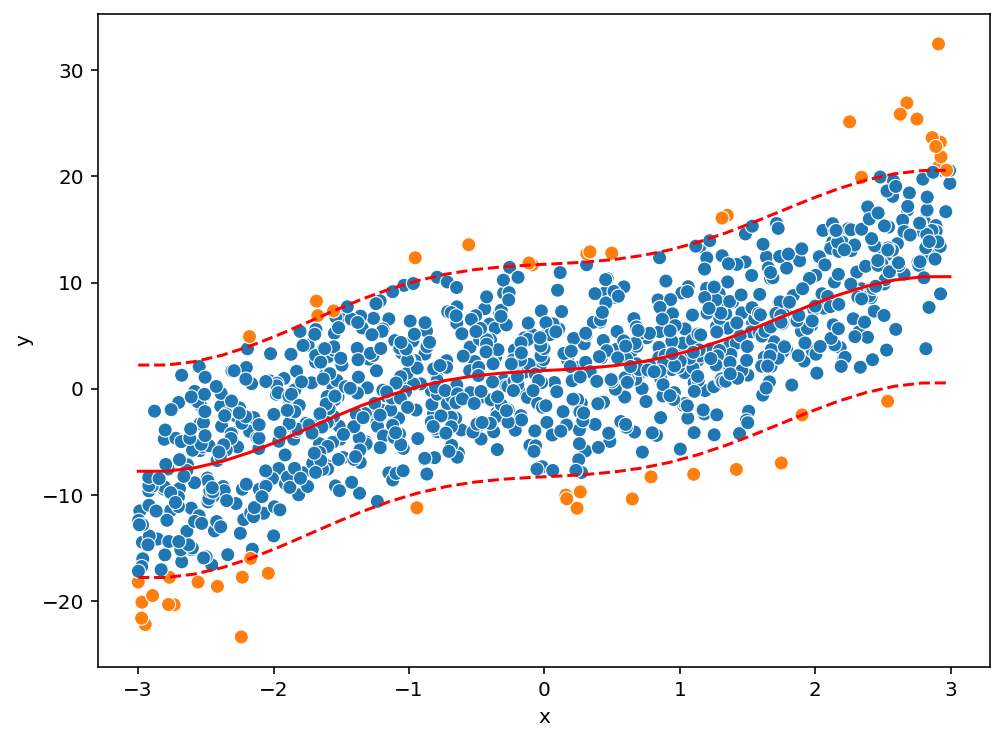

In [49]:
xx = np.linspace(x.min(), x.max(), 30)
xx = xx.reshape((len(xx), 1))
yy = model.predict(xx)
issv=np.isin(x.reshape(-1), model.support_vectors_).astype(int)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.reshape(-1), y=y, s=50, hue=issv)
plt.plot(xx, yy, color = 'r')
plt.plot(xx, yy + model.epsilon, color = 'r', linestyle='--')
plt.plot(xx, yy - model.epsilon, color = 'r', linestyle='--')
plt.legend([], [], frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()